# 분석 1

In [105]:
    """
    규제 선형 : 오차 값(mse) 규제 항 또는 벌점 항을 추가해서 좀더 단순화된 모델을 만들기 위함.
    릿지 : L2 규제, w의 제곱항 * alpha값
    라쏘 : L1 규제, w의 절대값 * alpha값 W를 0값으로 만들어줌, feature selection의 기능
    * alpha : 규제의 강도, 하이퍼 파라미터
    
    
    """

'\n규제 선형 : 오차 값(mse) 규제 항 또는 벌점 항을 추가해서 좀더 단순화된 모델을 만들기 위함.\n릿지 : L2 규제, w의 제곱항 * alpha값\n라쏘 : L1 규제, w의 절대값 * alpha값 W를 0값으로 만들어줌, feature selection의 기능\n* alpha : 규제의 강도, 하이퍼 파라미터\n\n\n'

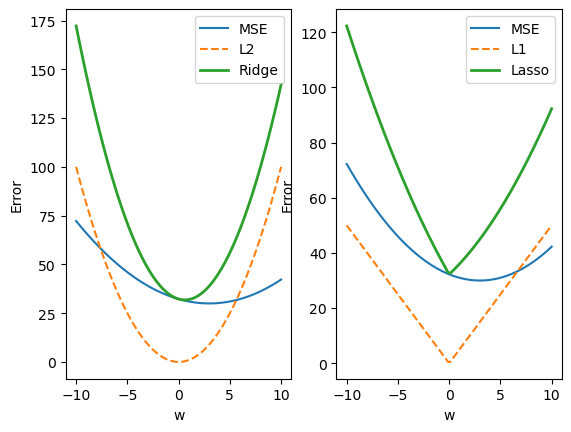

In [106]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.linspace(-10,10,100)
# len(rng)
# rng

# mse 값 만들기 

mse = (0.5*(rng-3))**2 + 30


# L2규제

l2 = rng**2


# L1규제

l1 = 5*np.abs(rng)


# ridge, lasso 계산

ridge = mse + l2
lasso = mse + l1


plt.subplot(1,2,1)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l2,'--',label='L2')
plt.plot(rng,ridge,lw=2,label='Ridge')
plt.xlabel('w')
plt.ylabel('Error')
plt.legend()


plt.subplot(1,2,2)
plt.plot(rng,mse,label='MSE')
plt.plot(rng,l1,'--',label='L1')
plt.plot(rng,lasso,lw=2,label='Lasso')
plt.xlabel('w')
plt.ylabel('Error')
plt.legend()






In [107]:
import pandas as pd

In [108]:
bostonDF = pd.read_csv('./data/Boston_house.csv')

In [109]:
bostonDF.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [110]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [111]:
bostonDF.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [112]:
bostonDF.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

In [113]:
bostonDF['RAD'].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [114]:
bostonDF['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [115]:
bostonDF['DIS'].value_counts()

DIS
3.4952    5
5.7209    4
5.2873    4
6.8147    4
5.4007    4
         ..
2.4220    1
2.1620    1
2.0407    1
1.9709    1
2.5050    1
Name: count, Length: 412, dtype: int64

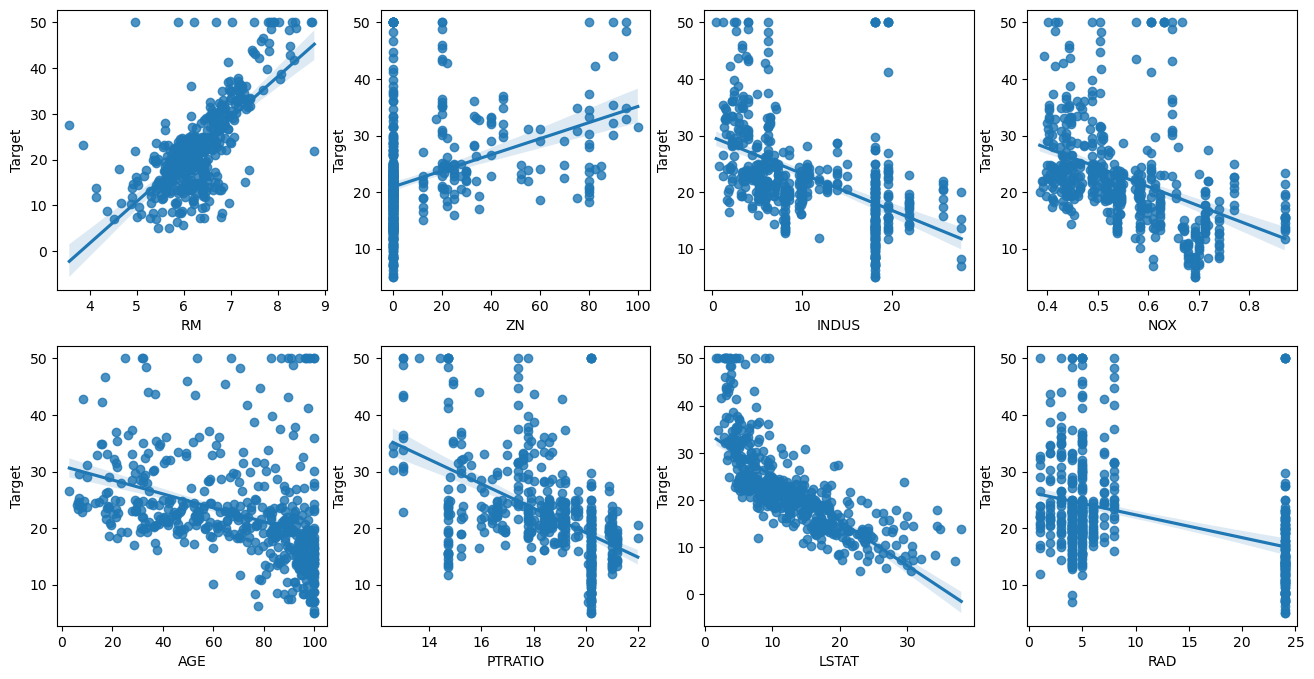

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)

lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]

for i , feature in enumerate(lm_features):
    row= int(i/4) # row 2개 만들기 위한 계산식
    col= i%4      # col 4개 만들기 위한 계산식
    sns.regplot(x=feature,y="Target",data=bostonDF,ax=axs[row][col])
    
    # rm과 lstat가 가장 큰 영향을 미침

In [117]:
# 선형 회귀
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



#X,y나누기
X = bostonDF.drop(['Target'],axis=1,inplace=False)

y = bostonDF["Target"]
# train/test분리

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=156)

lr = LinearRegression()


# 훈련
lr.fit(X_train,y_train)


y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test,y_preds) # mse = 실제값과 예측값의 차이를 제곱하여 평균
rmse = np.sqrt(mse)                      # rmse = mse에 루트를 씌움 (mse는 실제오류평균보다 커지는 특성이 있기 때문)



In [118]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7273505005599823
0.7572263323138937


In [119]:
print('mse : {0:.3f}'.format(mse))

print('mse : {0:.3f}'.format(rmse))


mse : 17.297
mse : 4.159


In [120]:
print('r2_score : {0:.3f}'.format(r2_score(y_test,y_preds)))

r2_score : 0.757


In [121]:
print('절편 값:',lr.intercept_)
print("회귀 계수값:",np.round(lr.coef_,1))

절편 값: 40.99559517216453
회귀 계수값: [  0.    0.    3.4  -0.1  -1.7   0.   -0.6 -19.8  -0.9   0.4   0.1  -0.
   3. ]


In [122]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X.columns)
coeff.sort_values(ascending=False) 

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
AGE         0.0
B           0.0
INDUS       0.0
TAX        -0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

# 규제 선형회귀 : Regularized Linear Models(Ridge,Lasso)

* 릿지(Ridge)회귀 : L2 정규화

In [123]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y_target = bostonDF['Target']
X_data = bostonDF.drop(['Target'],axis=1,inplace=False)

ridge = Ridge(alpha = 10) # default alpha = 1

neg_mse_scores = cross_val_score(ridge,X_data,y_target, \
                                scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [124]:
print('5 folds 의 개별 Negative MSE scores :', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores :', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores : [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds 의 개별 RMSE scores : [3.38  4.929 5.305 8.637 5.34 ]
5 folds 의 평균 RMSE 5.518


In [125]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score 이용하여 5 fold의 평균 rmse 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print("alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


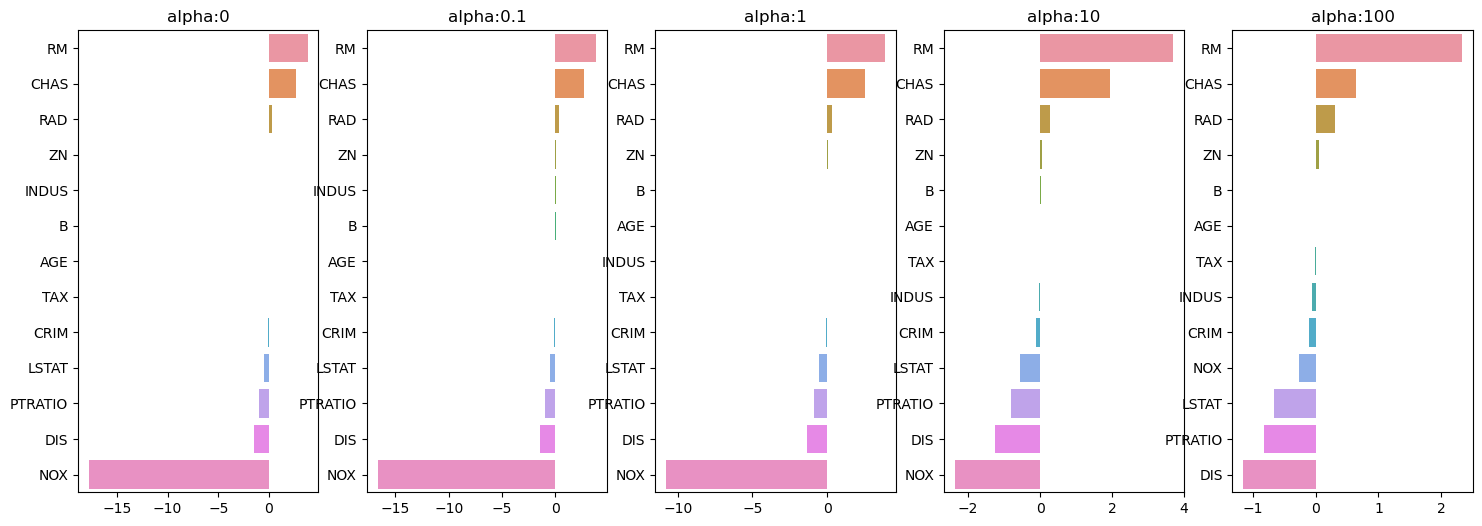

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [126]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1,ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(X_data,y_target)
    
    coeff = pd.Series(data=ridge.coef_,index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_ylim(-3,6)
    sns.barplot(x=coeff.values, y = coeff.index,ax=axs[pos])
plt.show()

# coeff_df
sort_column = 'alpha:'+str(alphas[0])

coeff_df.sort_values(by=sort_column,ascending=False)

* 라쏘(Lasso)회귀 : L1 정규화

In [127]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    
    if verbose: 
        print('########', model_name, '########')
    
    for param in params:
        if model_name == 'Ridge': 
            model = Ridge(alpha=param)
        elif model_name == 'Lasso': 
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': 
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:' + str(param)
            coeff_df[colname] = coeff
    
    return coeff_df


In [128]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

######## Lasso ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [129]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789730,3.703192,2.498176,0.949782,0.000000
CHAS,1.434346,0.955172,0.000000,0.000000,0.000000
RAD,0.270932,0.274717,0.277443,0.264221,0.061898
ZN,0.049065,0.049218,0.049556,0.049180,0.037248
B,0.010248,0.010249,0.009468,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011708,-0.010039,0.003601,0.020909,0.042504
TAX,-0.014290,-0.014571,-0.015442,-0.015213,-0.008604
INDUS,-0.042124,-0.036620,-0.005258,-0.000000,-0.000000
CRIM,-0.098196,-0.097900,-0.083293,-0.063444,-0.000000
